Mounted at /content/drive
Data Berhasil Di Load:
    id_tabel               uraian satuan  tahun   nilai
0   A.1.2.02                 Aceh   Unit   2022   329.0
1   A.1.2.02       Sumatera Utara   Unit   2022   660.0
2   A.1.2.02       Sumatera Barat   Unit   2022   282.0
3   A.1.2.02                 Riau   Unit   2022    76.0
4   A.1.2.02                Jambi   Unit   2022   136.0
5   A.1.2.02     Sumatera Selatan   Unit   2022   255.0
6   A.1.2.02             Bengkulu   Unit   2022   177.0
7   A.1.2.02              Lampung   Unit   2022     NaN
8   A.1.2.02      Bangka Belitung   Unit   2022     0.0
9   A.1.2.02       Kepulauan Riau   Unit   2022     0.0
10  A.1.2.02          DKI Jakarta   Unit   2022  2452.0
11  A.1.2.02           Jawa Barat   Unit   2022  2433.0
12  A.1.2.02          Jawa Tengah   Unit   2022  3091.0
13  A.1.2.02        DI Yogyakarta   Unit   2022   321.0
14  A.1.2.02           Jawa Timur   Unit   2022  1899.0
15  A.1.2.02               Banten   Unit   2022   913.0

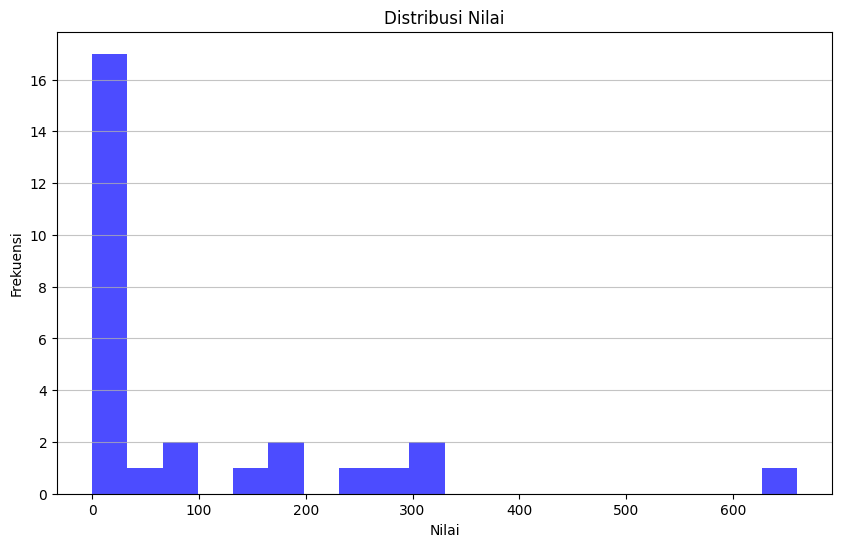

In [3]:
# Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
from google.colab import drive  # Untuk mengakses Google Drive
import matplotlib.pyplot as plt  # Untuk visualisasi data

# Menghubungkan Google Drive untuk mengakses file
drive.mount('/content/drive')

# Mendefinisikan path file Excel yang ingin dibaca
file_path = '/content/drive/My Drive/Colab Notebooks/data_stathub_u.xlsx'

# Gathering Data
df = pd.read_excel(file_path)  # Membaca file Excel ke dalam DataFrame
print("Data Berhasil Di Load:")
print(df)  # Menampilkan Data yang sudah di gatring yang telah dimuat

# Mengasses data untuk memahami struktur dan konten
print("\nBentuk DataFrame:", df.shape)  # Menampilkan bentuk (jumlah baris dan kolom) DataFrame
print("\nTipe Data:\n", df.dtypes)  # Menampilkan tipe data setiap kolom
print("\nStatistik Deskriptif:\n", df.describe())  # Menampilkan statistik deskriptif untuk kolom numerik
print("\nNilai Hilang:\n", df.isnull().sum())  # Menampilkan jumlah nilai hilang per kolom
print("\nJumlah Duplikat:\n", df.duplicated().sum())  # Menampilkan jumlah baris duplikat dalam DataFrame

# Asessing Data
df = df.dropna()  # Menghapus baris yang memiliki nilai hilang
df = df.drop_duplicates()  # Menghapus baris yang duplikat
df['nilai'] = df['nilai'].astype(int)  # Mengubah tipe data kolom 'nilai' menjadi integer

# Menghapus outlier menggunakan metode Interquartile Range (IQR)
Q1 = df['nilai'].quantile(0.25)  # Menghitung kuartil pertama (Q1)
Q3 = df['nilai'].quantile(0.75)  # Menghitung kuartil ketiga (Q3)
IQR = Q3 - Q1  # Menghitung rentang interkuartil (IQR)
# Menghapus baris yang nilai 'nilai' nya berada di luar batas bawah dan atas
df = df[(df['nilai'] >= (Q1 - 1.5 * IQR)) & (df['nilai'] <= (Q3 + 1.5 * IQR))]

# Cleaning Data
print("\nData Setelah Pembersihan:")
print(df)  # Menampilkan DataFrame setelah pembersihan

# Menghitung dan menampilkan statistik deskriptif setelah pembersihan
print("\nStatistik Deskriptif Setelah Pembersihan:")
print(df.describe())  # Menampilkan statistik deskriptif untuk kolom yang tersisa

# Mencetak median dan mode dari kolom 'nilai'
print("\nMedian Nilai:")
print(df['nilai'].median())  # Menghitung dan menampilkan median
print("\nMode Nilai:")
print(df['nilai'].mode())  # Menghitung dan menampilkan modus

# Mencetak rentang nilai
rentang = df['nilai'].max() - df['nilai'].min()  # Menghitung rentang nilai
print("\nRentang Nilai:")
print(rentang)  # Menampilkan rentang nilai

# Mencetak varians dan deviasi standar
print("\nVarians Nilai:")
print(df['nilai'].var())  # Menghitung dan menampilkan varians
print("\nDeviasi Standar Nilai:")
print(df['nilai'].std())  # Menghitung dan menampilkan deviasi standar

# Menghitung persentil
persentil_25 = df['nilai'].quantile(0.25)  # Menghitung persentil ke-25
persentil_50 = df['nilai'].quantile(0.50)  # Menghitung persentil ke-50 (median)
persentil_75 = df['nilai'].quantile(0.75)  # Menghitung persentil ke-75
# Menampilkan persentil
print("\nPersentil 25, 50, dan 75:")
print(f"25th: {persentil_25}, 50th: {persentil_50}, 75th: {persentil_75}")

# Visualisasi Histogram untuk distribusi nilai
plt.figure(figsize=(10, 6))  # Menentukan ukuran figure
plt.hist(df['nilai'], bins=20, color='blue', alpha=0.7)  # Membuat histogram dari kolom 'nilai'
plt.title('Distribusi Nilai')  # Menentukan judul grafik
plt.xlabel('Nilai')  # Menentukan label sumbu x
plt.ylabel('Frekuensi')  # Menentukan label sumbu y
plt.grid(axis='y', alpha=0.75)  # Menambahkan grid pada sumbu y
plt.show()  # Menampilkan grafik
